In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colorcet as cc
import matplotlib as mpl
import statistics as st


%matplotlib inline

%matplotlib notebook

In [11]:
#The path to 12 folders with specified metallicty and alpha:
path = '/Users/melikakeshavarz/Desktop/F_data/H/'

folder  = os.listdir(path)
#I dropped the element 0 because my computer made a backup folder, so do not use this line of code.
folder.pop(0)


#in this folder list there should be all folders with various metallicity and alpha.

folder

['FZ0.02A1.csv',
 'FZ0.01A0.5.csv',
 'FZ0.02A3.csv',
 'FZ0.01A1.csv',
 'FZ0.02A0.5.csv',
 'FZ0.01A3.csv',
 'FZ0.016A0.5.csv',
 'FZ0.014A1.csv',
 'FZ0.016A3.csv',
 'FZ0.014A0.5.csv',
 'FZ0.016A1.csv',
 'FZ0.014A3.csv']

In [4]:
#------------------------------------------------------------------------------------------------
#The dataframes are read by their original name. like FZ0_01A0_5 (I have substituted'.' with '_')
#------------------------------------------------------------------------------------------------




df_n = [] #Dataframe's names are stored in this list.


for df in folder:
    name = df.replace('.csv', '')
    name = name.replace('.', '_')
    df_n.append(name)


    
    

    globals()[name] = pd.read_csv(path+df)

    

#Here in df_n there are name of datasets that we created out of folders in folder.

df_n

['FZ0_02A1',
 'FZ0_01A0_5',
 'FZ0_02A3',
 'FZ0_01A1',
 'FZ0_02A0_5',
 'FZ0_01A3',
 'FZ0_016A0_5',
 'FZ0_014A1',
 'FZ0_016A3',
 'FZ0_014A0_5',
 'FZ0_016A1',
 'FZ0_014A3']

In [5]:
#Btime is a dataframe of BWorldtime for different metalicity for each column.
Btime = pd.DataFrame(columns = df_n)





for df in folder:
    name = df.replace('.csv', '')
    name = name.replace('.', '_')
    Btime[name] = globals()[name]['BWorldtime']


    
    

<IPython.core.display.Javascript object>


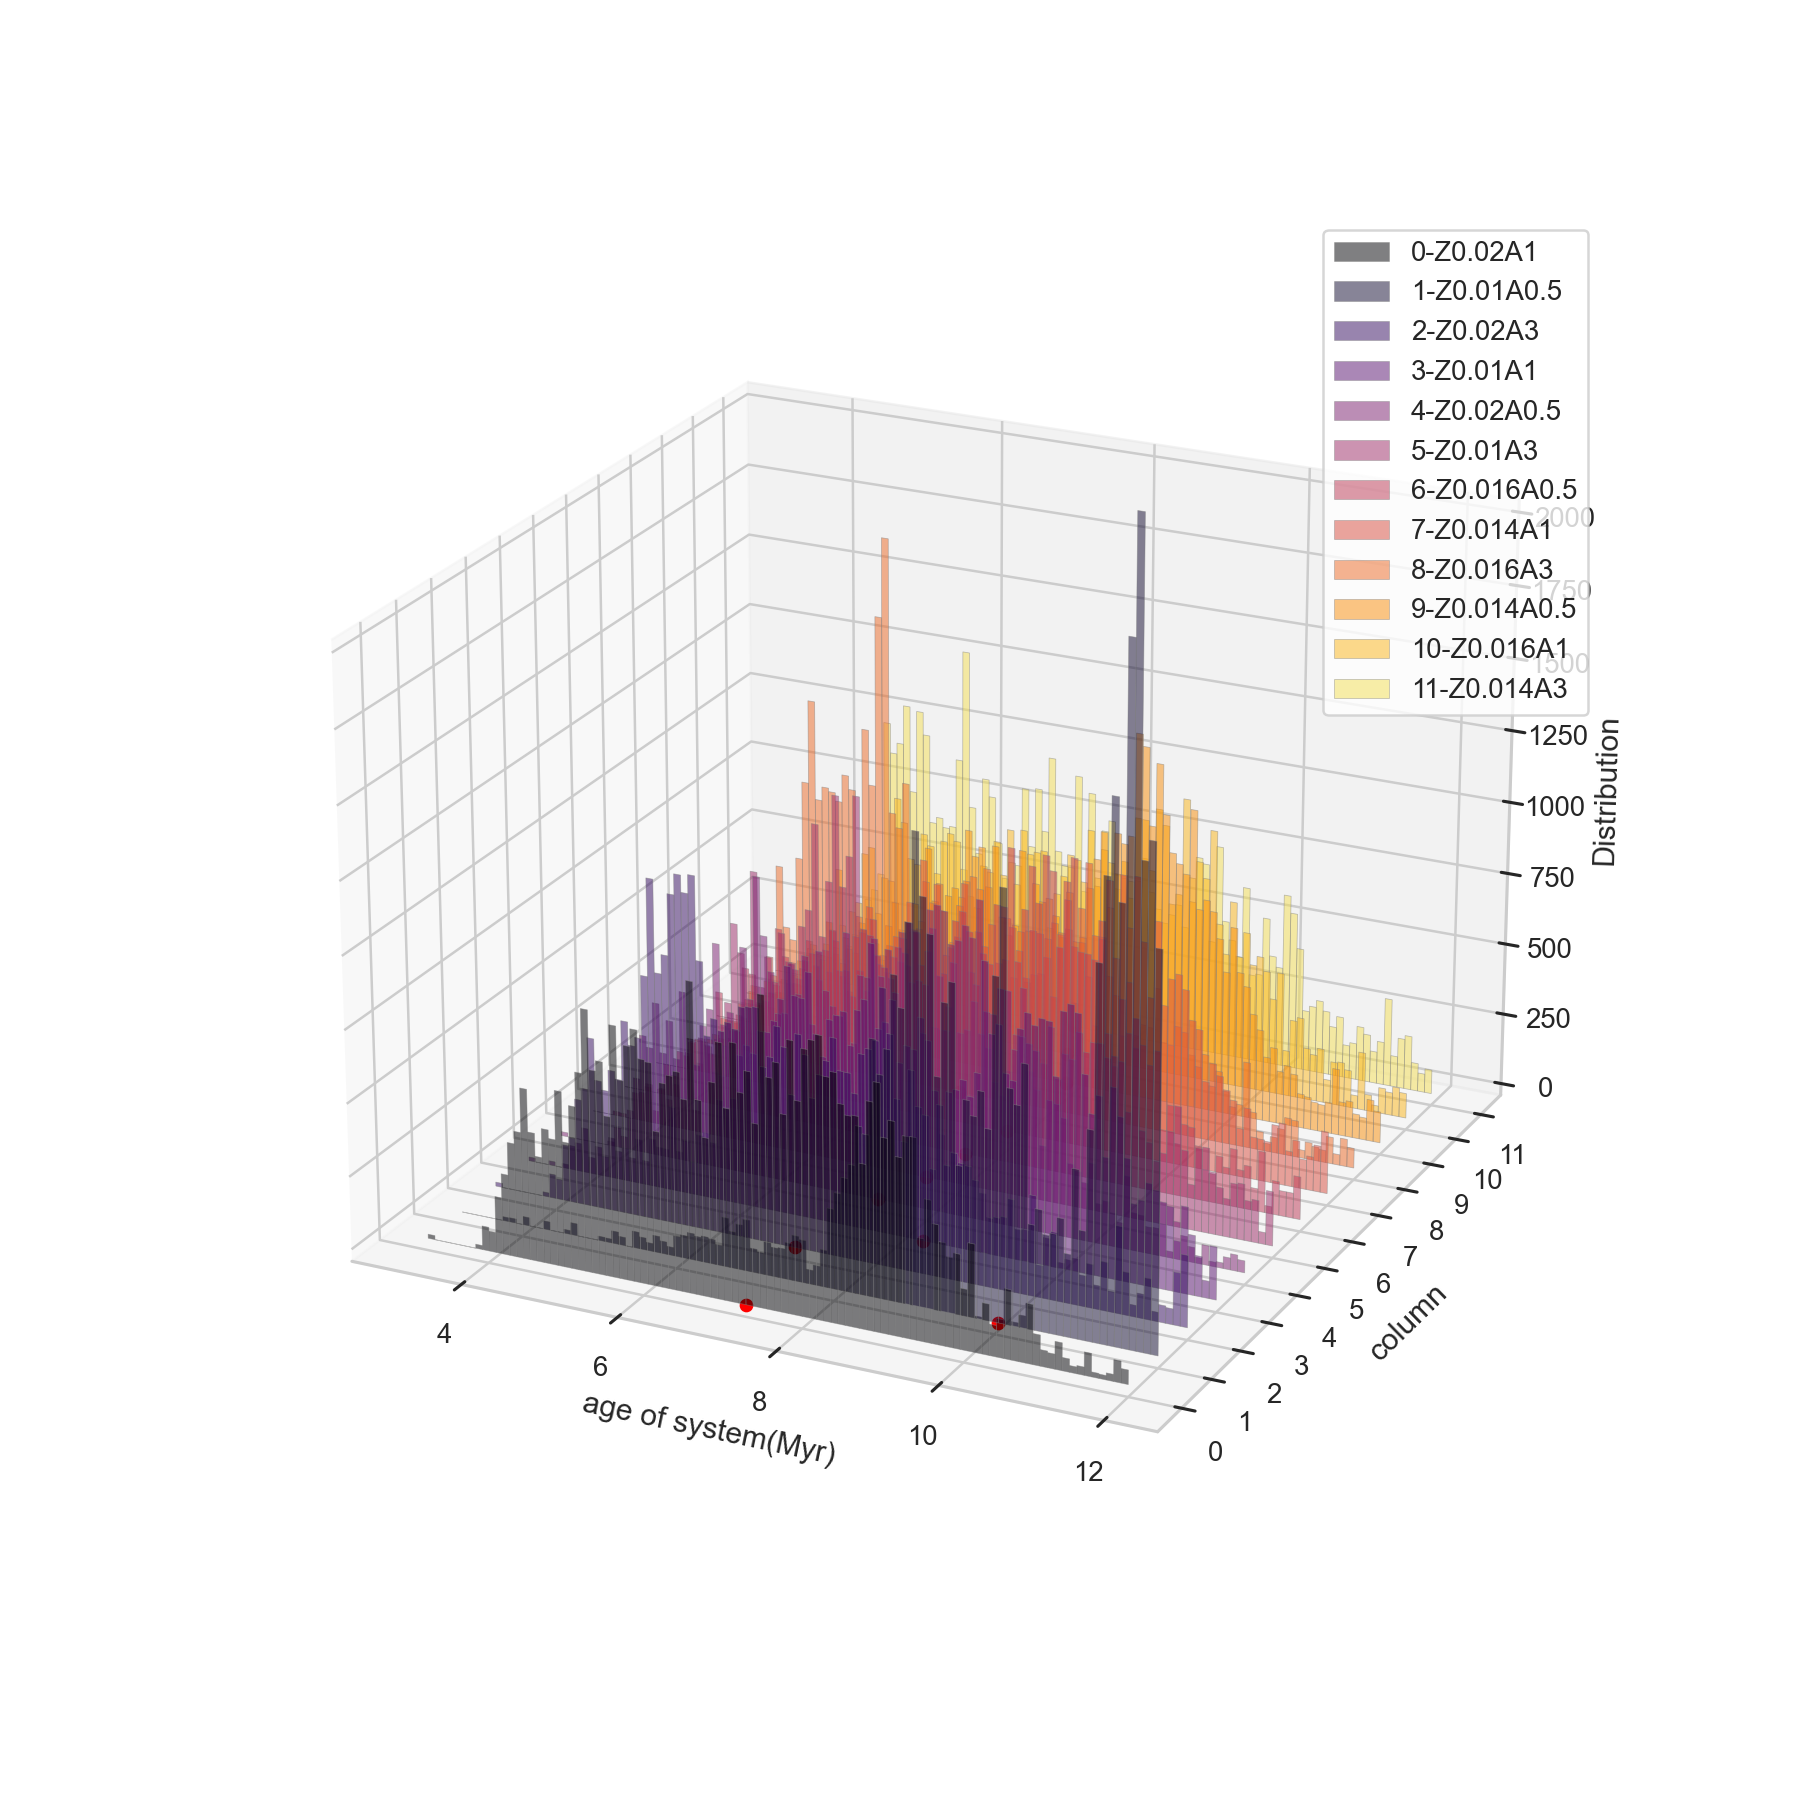

In [12]:
#----------------------------------------------------------------------------------------------
#Here we plotted the distribution of Bworldtime for different metallicity and alpha:
#The number of columns show 12 folders with different metallicity and alpha:
#---------------------------------------------------------------------------------------------
ncol = Btime.shape[1]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

#colors: 
my_cmap = plt.cm.inferno

#ytick:
yticks = np.arange(ncol)

#here the x coordinate is divided evenly between max and min of the Btime dataframe:
xbins = np.linspace(Btime.min().min(), Btime.max().max(), 100)
#Center of the bars:
xcenter = np.convolve(xbins, np.ones(2), "valid")/2
#width of the bars:
xwidth = np.diff(xbins)

#histogram for each column:
for i, ytick in enumerate(yticks):


    col =  Btime.iloc[:, ytick]


    histvals, _ = np.histogram(col, bins=xbins)

    #plotting the histogram as a bar for each bin
    ax.bar(left=xcenter, height=histvals, width=xwidth, zs=ytick, zdir="y", color=my_cmap(i/ncol), alpha=0.5, edgecolor="grey", linewidth=0.3, label =  '{}-'.format(ytick)+df_n[ytick].replace('F', '').replace('_', '.'))
    ax.scatter(Btime.iloc[:, ytick].mean(), ytick, zs = 0, color = 'red')#red dots are the means of distributions.

ax.set_xlabel("age of system(Myr)")
ax.set_ylabel("column")
ax.set_zlabel("Distribution")


ax.set_yticks(yticks[::1])
ax.set_zlim3d(0,2000)
ax.legend()
plt.show()



#---------------------------------------------------------------------------------------------
#The red dots show the mean of Bworldtime for different Metalicity and alpha.
#--------------------------------------------------------------------------------------------

In [7]:
#----------------------------------------------------------------------------------------------
#Make a data frame for Mass_1 which is the least massive one in the system:
#We know the star 1 is low mass but we do not know how much low:
#----------------------------------------------------------------------------------------------

Mass_1_df = pd.DataFrame(columns = df_n)





for df in folder:
    name = df.replace('.csv', '')
    name = name.replace('.', '_')
    Mass_1_df[name] = globals()[name]['Mass_1']


    




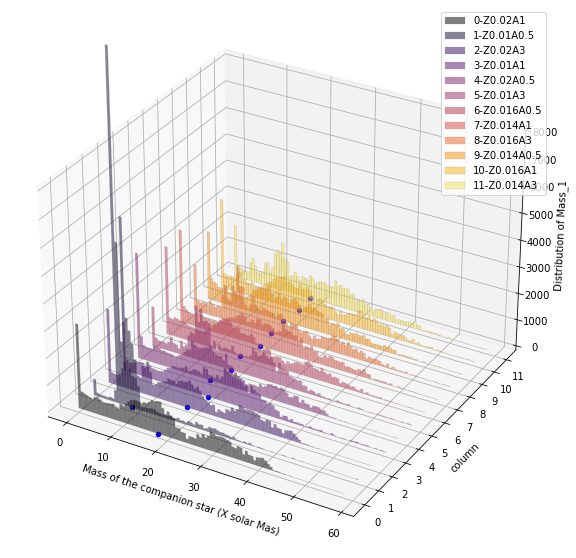

In [8]:
#------------------------------------------------------------------------------------------------------------
#Here we plotted the distribution of mass for star number 1 (low mass star) for varoius metalicity and alpha.
#we know star 1 is low mass, but we don't know how low.
#------------------------------------------------------------------------------------------------------------


ncol_M = Mass_1_df.shape[1]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")


my_cmap = plt.cm.inferno


yticks_M = np.arange(ncol_M)


xbins = np.linspace(Mass_1_df.min().min(), Mass_1_df.max().max(), 100)

xcenter = np.convolve(xbins, np.ones(2), "valid")/2

xwidth = np.diff(xbins)







for i, ytick_M in enumerate(yticks_M):


    col =  Mass_1_df.iloc[:, ytick_M]


    histvals, _ = np.histogram(col, bins=xbins)

    ax.bar(left=xcenter, height=histvals, width=xwidth, zs=ytick_M, zdir="y", color=my_cmap(i/ncol_M), alpha=0.5, edgecolor="grey", linewidth=0.3, label = '{}-'.format(ytick_M)+df_n[ytick_M].replace('F', '').replace('_', '.'))
    ax.scatter(Mass_1_df.iloc[:, ytick_M].mean(), ytick_M, zs = 0, color = 'blue')#The blue dots are the means of mass for each hist.

ax.set_xlabel("Mass of the companion star (X solar Mas)")
ax.set_ylabel("column")
ax.set_zlabel("Distribution of Mass_1")


ax.set_yticks(yticks[::1])
ax.set_zlim3d(0,8000)
ax.legend()
plt.show()



The mean mass of star one independent of metalicity and alpha is:  17.15227942232307 solar mass


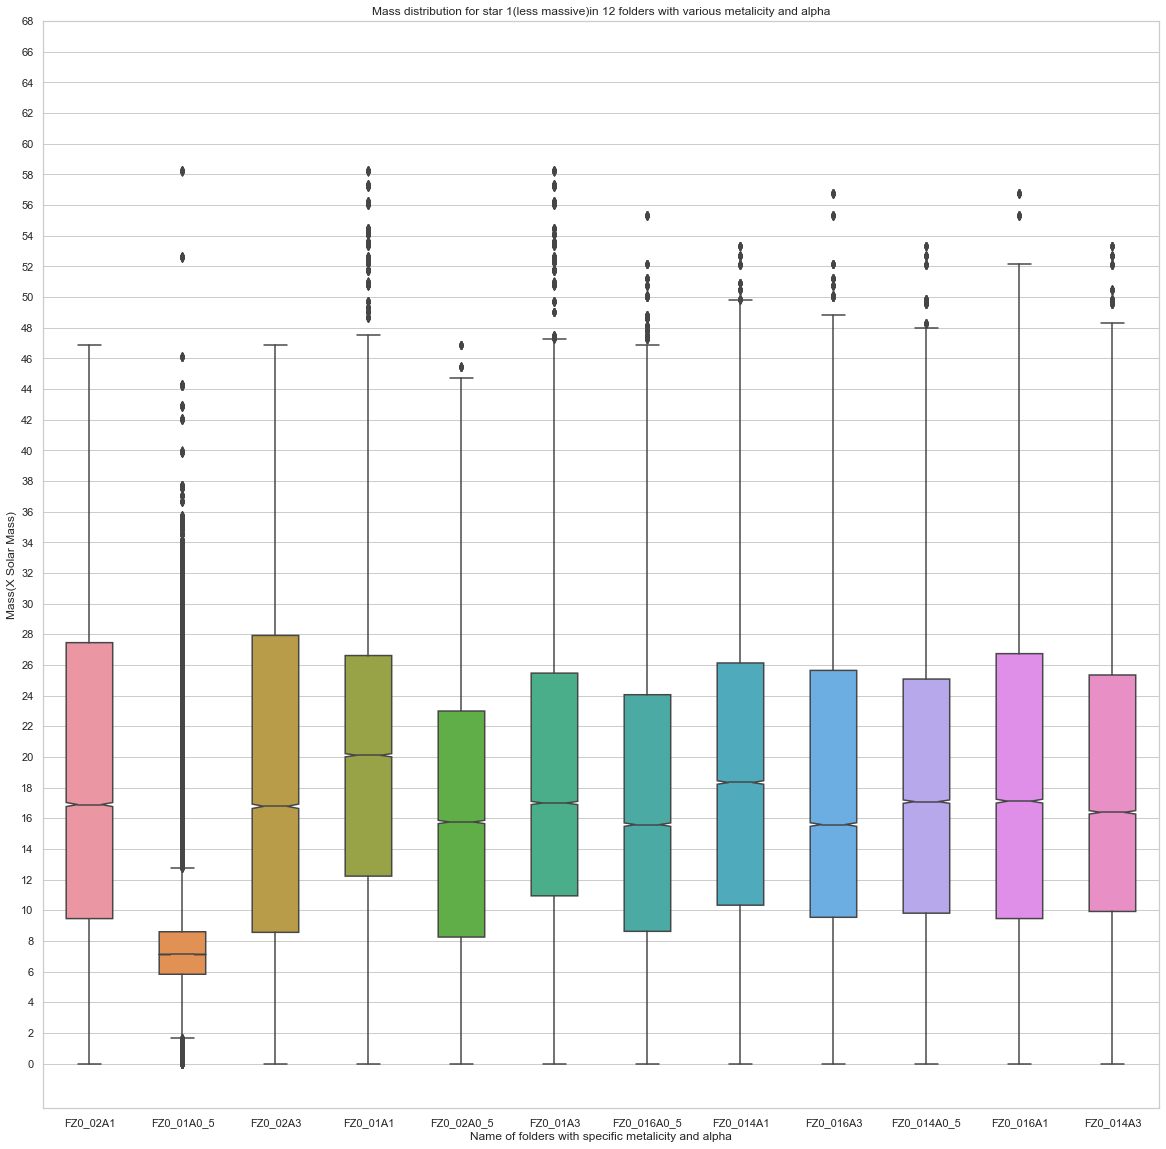

In [9]:
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(figsize = (20, 20))




box = sns.boxplot(data = Mass_1_df, width = 0.5, notch = True)
plt.title('Mass distribution for star 1(less massive)in 12 folders with various metalicity and alpha')
plt.xlabel('Name of folders with specific metalicity and alpha')
plt.ylabel('Mass(X Solar Mass)')
ytick = plt.yticks(range(0, 70,2))

#Taking into account all masses all together and calculating the mean:

i = 0
mean_mass_list = []
while i<12:
    M = Mass_1_df.iloc[:, i].mean()
    mean_mass_list.append(M)
    i +=1
#Variable MEAN_MASS shows the mean of all masses for star 1    
MEAN_MASS = st.mean(mean_mass_list)
print('The mean mass of star one independent of metalicity and alpha is: ', MEAN_MASS, 'solar mass')

